## Predicting Google Stock Prices Using LSTM and GRU Model 

This use-case provides a demo of how RNN and GRU can be used to model time series data. In our use-case, we will use 'Google stock price' data to predict the number of future stock prices based on the available historical data. You have been given a dataset that contains google stock prices from 2013 to 2018. We have to model the time series data using RNN GRU sequential model.

**Similar examples with LSTM:**<br>
https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233<br>
https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

**Understanding LSTM layer:**<br>
https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

### **Importing Libraries** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,GRU
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
# helping function
def predictions_plot(test, predicted):
    plt.plot(test, color = 'red', label = 'Real Google Stock Price')
    plt.plot(predicted, color = 'blue',label = 'Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()
    
def rmse_return(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("Root Mean Squared Error is {}.".format(rmse))

### Collecting the Data

In [5]:
dataset = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\trainset.csv", index_col='Date', parse_dates = ['Date'])
print(dataset.shape)
dataset.head()

(1259, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [6]:
# We are dividing this dataset into training set and testing set, upto 2016 is for training from 2017 is for testing

training_set = dataset[:'2016']['High'].values.reshape(-1,1)   # we are taking High column
testing_set = dataset['2017':]['High'].values.reshape(-1,1)
print(training_set.shape, testing_set.shape, dataset.shape)
type(training_set), type(testing_set), type(dataset)

(1008, 1) (251, 1) (1259, 6)


(numpy.ndarray, numpy.ndarray, pandas.core.frame.DataFrame)

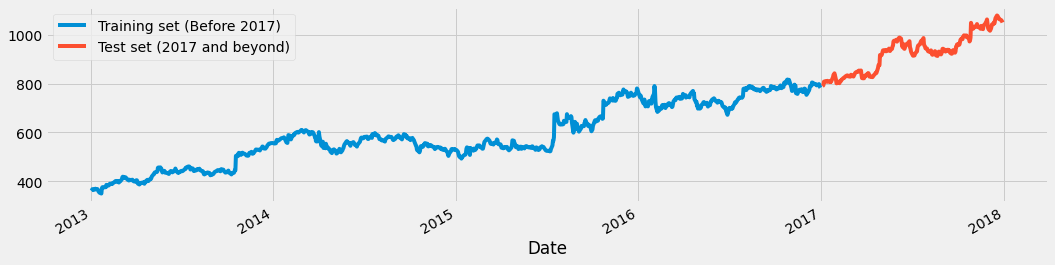

In [5]:
#plotting 
dataset['High'][:'2016'].plot(figsize = (16,4), legend = True)
dataset['High']['2017':].plot(figsize = (16,4), legend = True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.show()

In [7]:
## Scaling the training set

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1008, 1)

In [8]:
training_set[:10]

array([[361.151062],
       [363.600128],
       [368.339294],
       [367.301056],
       [365.771027],
       [366.789398],
       [370.092896],
       [368.816193],
       [368.701935],
       [365.125214]])

In [9]:
training_set_scaled[:10]

array([[0.02307584],
       [0.02832809],
       [0.03849167],
       [0.03626508],
       [0.03298379],
       [0.03516778],
       [0.04225244],
       [0.03951443],
       [0.03926939],
       [0.03159878]])

- **we create a data structure with 60 timesteps and 1 output**
- **One row of X_train will have 60 sequential values, and y_train will have the 61st value**

In [90]:
len(training_set_scaled)

1008

In [10]:
X_train = []
y_train = []
train_len = len(training_set_scaled)
for i in range(60, train_len):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)    

(948, 60) (948,)


For being used by the RNN/GRU/LSTM layers, we need the shape of X_train to be: [ batch_size, time_steps, Features ]
* We will use the full data in a single batch, so batch size will be 948
* There are 60 time steps
* At each time step, the price is the feature, which is of 1-dimension. Compare this with a word, which can have higher dimension based on the word embedding chosen

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))   # converting into 3 dimension
print(X_train.shape)

(948, 60, 1)


## LSTM Model

In [93]:
model = Sequential()

# Adding first Lstm Layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
model.add(Dropout(rate = 0.2))

# Adding 2nd Lstm Layer
model.add(LSTM(units = 50, return_sequences = True))     #if return_seq is True we should add another layer if false dont add
model.add(Dropout(rate = 0.2))

# Adding 3rd Lstm Layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

# Adding 4th Lstm Layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

# Adding output Layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

### Calculating the Number of parameters to Learn

In [94]:
lstmLayer = 0
print('LSTM Layer:', model.layers[lstmLayer].name)
LSTM_ouput_dimension = 50
if lstmLayer == 0:
    features = X_train.shape[2]
else:
    features = LSTM_output_dimension
    
Wx = model.layers[lstmLayer].get_weights()[0]
Wh = model.layers[lstmLayer].get_weights()[1]
b = model.layers[lstmLayer].get_weights()[2]

print("Input [batch_size, timesteps, features]", X_train.shape)
print("x --> Input feature/dimension:", features)
print("h --> Number of hidden states/LSTM units(cells)/dimensionality of the output space:", LSTM_ouput_dimension)

print("------------------------------------------------------------------------------------------------------")
print("Shapes of matrix and vectors:")

print("Wx :", Wx.shape)
print("Wh:", Wh.shape)
print("b:", b.shape)

print("--------------------------------------------------------------------------------------------------------")
print("parameters:")
print("Wx:", Wx.size, '4*features*LSTM_output_dimension =', 4*features*LSTM_ouput_dimension)
print("Wh:", Wh.size, '4*LSTM_ouput_dimension*LSTM_ouput_dimension =', 4*LSTM_ouput_dimension*LSTM_ouput_dimension)
print("b:", b.size, '4*LSTM_ouput_dimension =', 4*LSTM_ouput_dimension)

print(" --------------------------------------------------------------------------------------------------------------")
print("Total Number of Parameters: Wx + Wh + b:", Wx.size + Wh.size + b.size)
print("Total Number of Parameters:4 × ((x + h) × h +h):", 
      4 *((features+LSTM_ouput_dimension)* LSTM_ouput_dimension+LSTM_ouput_dimension))

LSTM Layer: lstm_4
Input [batch_size, timesteps, features] (948, 60, 1)
x --> Input feature/dimension: 1
h --> Number of hidden states/LSTM units(cells)/dimensionality of the output space: 50
------------------------------------------------------------------------------------------------------
Shapes of matrix and vectors:
Wx : (1, 200)
Wh: (50, 200)
b: (200,)
--------------------------------------------------------------------------------------------------------
parameters:
Wx: 200 4*features*LSTM_output_dimension = 200
Wh: 10000 4*LSTM_ouput_dimension*LSTM_ouput_dimension = 10000
b: 200 4*LSTM_ouput_dimension = 200
 --------------------------------------------------------------------------------------------------------------
Total Number of Parameters: Wx + Wh + b: 10400
Total Number of Parameters:4 × ((x + h) × h +h): 10400


In [95]:
model.layers[lstmLayer]

### Training the Model

In [96]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,y_train, epochs = 50, batch_size = 150)

Epoch 1/50
7/7 [==============================] - 13s 314ms/step - loss: 0.1457
Epoch 2/50
7/7 [==============================] - 2s 328ms/step - loss: 0.0267
Epoch 3/50
7/7 [==============================] - 2s 326ms/step - loss: 0.0175
Epoch 4/50
7/7 [==============================] - 2s 325ms/step - loss: 0.0111
Epoch 5/50
7/7 [==============================] - 2s 324ms/step - loss: 0.0105
Epoch 6/50
7/7 [==============================] - 2s 323ms/step - loss: 0.0083
Epoch 7/50
7/7 [==============================] - 2s 317ms/step - loss: 0.0078
Epoch 8/50
7/7 [==============================] - 2s 327ms/step - loss: 0.0071
Epoch 9/50
7/7 [==============================] - 2s 327ms/step - loss: 0.0068
Epoch 10/50
7/7 [==============================] - 2s 334ms/step - loss: 0.0066
Epoch 11/50
7/7 [==============================] - 2s 329ms/step - loss: 0.0065
Epoch 12/50
7/7 [==============================] - 2s 327ms/step - loss: 0.0066
Epoch 13/50
7/7 [==============================]

In [97]:
X_train.shape

(948, 60, 1)

In [98]:
948/150

6.32

In [99]:
dataset_total = dataset['High']
print(len(dataset_total), len(testing_set))
inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values  # len(training_Set)- 60 // 1259 - 948
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
#inputs = sc.transform(inputs)

1259 251
(311,)
(311, 1)


In [100]:
inputs = sc.transform(inputs)
inputs

array([[0.92236571],
       [0.92060712],
       [0.94145264],
       [0.94767201],
       [0.9387719 ],
       [0.92395268],
       [0.92980751],
       [0.93388216],
       [0.96768097],
       [0.97409328],
       [0.97274218],
       [0.96315591],
       [0.99678311],
       [1.        ],
       [0.97919742],
       [0.97171281],
       [0.99744793],
       [0.95749415],
       [0.94168851],
       [0.92487497],
       [0.89978321],
       [0.90066243],
       [0.93246679],
       [0.95486276],
       [0.94541367],
       [0.94529141],
       [0.88011733],
       [0.87383356],
       [0.88791504],
       [0.89208406],
       [0.90568084],
       [0.91061338],
       [0.89924706],
       [0.91481683],
       [0.89620819],
       [0.88916745],
       [0.92032845],
       [0.91811945],
       [0.90630273],
       [0.87812274],
       [0.86557693],
       [0.88680845],
       [0.89738128],
       [0.90280703],
       [0.91743317],
       [0.94155984],
       [0.94546301],
       [0.973

In [101]:
# Preparing for X_test and predicting for the prices

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i - 60:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.expand_dims(X_test,2)
print(X_test.shape)

(251, 60)
(251, 60, 1)


In [103]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [78]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

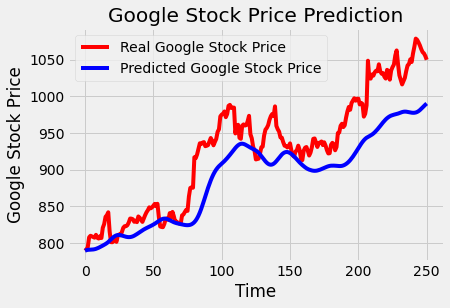

In [104]:
# Visualizing the plot for LSTM
predictions_plot(testing_set, predicted_stock_price)

In [105]:
print(testing_set[25], predicted_stock_price[25])

[811.840027] [811.0219]


In [107]:
print(testing_set[200], predicted_stock_price[200])

[996.719971] [929.33075]


In [106]:
# Evaluating the LSTM
rmse_return(testing_set, predicted_stock_price)

Root Mean Squared Error is 46.96188648915176.


## GRU - Gated Recurrent Units

In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the output, neither they have the output gate.

### Create the GRU Model
 - **units - hidden layer dimension(no. of neurons)**
 - **return sequences - when True, returns the output of each time step. Default False, returns the last output** 

In [12]:
from keras.layers import SimpleRNN

In [16]:
# The RNN and GRU Architecture
model = Sequential()
model.add(SimpleRNN(50, return_sequences = True, input_shape = (X_train.shape[1],1), activation = 'tanh'))
model.add(Dropout(rate = 0.2))
model.add(SimpleRNN(50, return_sequences = True, input_shape = (X_train.shape[1],1), activation = 'tanh'))
model.add(Dropout(rate = 0.2))

# GRU Layer
model.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1), activation = 'tanh'))
model.add(Dropout(rate = 0.2))
# GRU 2nd layer
model.add(GRU(units = 50, return_sequences = False,activation = 'tanh'))
model.add(Dropout(rate = 0.2))

# Adding the output layer
model.add(Dense(units = 1))

In [17]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

In [43]:
# GRU Layer
model1 = Sequential()
model1.add(GRU(units = 120, return_sequences = True, input_shape = (X_train.shape[1],1), activation = 'tanh'))
model1.add(Dropout(rate = 0.2))
# GRU 2nd layer
model1.add(GRU(units = 120, return_sequences = False,activation = 'tanh'))
model1.add(Dropout(rate = 0.2))

# Adding the output layer
model1.add(Dense(units = 1))

In [44]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 60, 120)           44280     
                                                                 
 dropout_14 (Dropout)        (None, 60, 120)           0         
                                                                 
 gru_8 (GRU)                 (None, 120)               87120     
                                                                 
 dropout_15 (Dropout)        (None, 120)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 121       
                                                                 
Total params: 131,521
Trainable params: 131,521
Non-trainable params: 0
_________________________________________________________________


## Training the GRU Model
There aren't definitive results on one optimization algorithm being "better" than another. The common wisdom (which needs to be taken with a pound of salt) has been that Adam requires less experimentation to get convergence on the first try than SGD and variants thereof. However, this is highly dataset/model dependent. More recently some groups have made the claim that despite training faster, models trained with Adam generalize worse to the validation or test sets. See https://arxiv.org/abs/1712.07628 for more information.

Gradient descent optimization algorithms - nice blog - https://ruder.io/optimizing-gradient-descent/

In [45]:
# Compiling the Gru
model1.compile(optimizer = 'adam',loss = 'mean_squared_error')
# fitting
model1.fit(X_train, y_train, epochs = 50, batch_size = 150)

Epoch 1/50
7/7 [==============================] - 8s 282ms/step - loss: 0.1539
Epoch 2/50
7/7 [==============================] - 2s 281ms/step - loss: 0.0321
Epoch 3/50
7/7 [==============================] - 2s 278ms/step - loss: 0.0192
Epoch 4/50
7/7 [==============================] - 2s 263ms/step - loss: 0.0067
Epoch 5/50
7/7 [==============================] - 2s 272ms/step - loss: 0.0069
Epoch 6/50
7/7 [==============================] - 2s 265ms/step - loss: 0.0052
Epoch 7/50
7/7 [==============================] - 2s 266ms/step - loss: 0.0032
Epoch 8/50
7/7 [==============================] - 2s 274ms/step - loss: 0.0030
Epoch 9/50
7/7 [==============================] - 2s 267ms/step - loss: 0.0029
Epoch 10/50
7/7 [==============================] - 2s 256ms/step - loss: 0.0025
Epoch 11/50
7/7 [==============================] - 2s 247ms/step - loss: 0.0027
Epoch 12/50
7/7 [==============================] - 2s 263ms/step - loss: 0.0026
Epoch 13/50
7/7 [==============================] 

## Test the GRU Model
* We use the previous 60 days’ stock prices to predict the next-day price
* So, we need the 60 days’ price before the 1st date in the test dataset.
* Accordingly, we create the input for prediction, index starting from the date 60 days before the first date in the test dataset.

In [46]:
dataset_total = dataset["High"]
print(len(dataset_total),len(testing_set))
inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values  # last 60 values of train data+all values of test
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)

1259 251
(311,)
(311, 1)


In [47]:
inputs = sc.transform(inputs)

In [38]:
inputs

array([[0.92236571],
       [0.92060712],
       [0.94145264],
       [0.94767201],
       [0.9387719 ],
       [0.92395268],
       [0.92980751],
       [0.93388216],
       [0.96768097],
       [0.97409328],
       [0.97274218],
       [0.96315591],
       [0.99678311],
       [1.        ],
       [0.97919742],
       [0.97171281],
       [0.99744793],
       [0.95749415],
       [0.94168851],
       [0.92487497],
       [0.89978321],
       [0.90066243],
       [0.93246679],
       [0.95486276],
       [0.94541367],
       [0.94529141],
       [0.88011733],
       [0.87383356],
       [0.88791504],
       [0.89208406],
       [0.90568084],
       [0.91061338],
       [0.89924706],
       [0.91481683],
       [0.89620819],
       [0.88916745],
       [0.92032845],
       [0.91811945],
       [0.90630273],
       [0.87812274],
       [0.86557693],
       [0.88680845],
       [0.89738128],
       [0.90280703],
       [0.91743317],
       [0.94155984],
       [0.94546301],
       [0.973

In [52]:
len(training_set)

1008

In [53]:
len(testing_set)

251

In [56]:
1008+251 #dataset_total

1259

In [58]:
1008- 60   # last 60 values of train data

948

In [59]:
1008 - 948   # last 60 values of train data

60

In [61]:
60+251 # last 60 days + 251(len(testing data))

311

In [48]:
# preparing the X_test and predicting the prices
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.expand_dims(X_test, 2)
print(X_test.shape)

(251, 60)
(251, 60, 1)


In [49]:
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

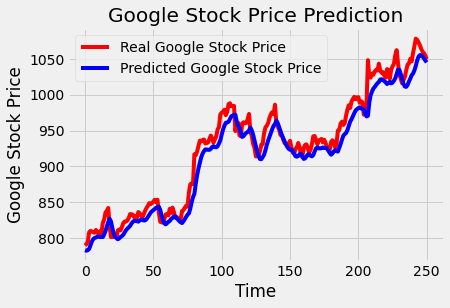

In [50]:
# Visualizing the results for GRU
predictions_plot(testing_set, predicted_stock_price)

In [51]:
# Evaluate the GRU
rmse_return(testing_set, predicted_stock_price)

Root Mean Squared Error is 17.899186054444186.


### comparing to LSTM and RNN, GRU is good much better than lstm & rnn

In [ ]:
# LSTM Model with another parameters and values
# Lets see how accurate predictions with this

In [13]:
model = Sequential()

# Taking 50 neurons
# Adding first Lstm Layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
model.add(Dropout(rate = 0.2))

# Adding 2nd Lstm Layer
model.add(LSTM(units = 50, return_sequences = True))     #if return_seq is True we should add another layer if false dont add
model.add(Dropout(rate = 0.2))

# Adding 3rd Lstm Layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

# Adding 4th Lstm Layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

# Adding output Layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [92]:
model0 = Sequential()

# Taking 50 neurons
# Adding first Lstm Layer
model0.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
model0.add(Dropout(rate = 0.2))

# Adding 2nd Lstm Layer
model0.add(LSTM(units = 50, return_sequences = True))     #if return_seq is True we should add another layer if false dont add
model0.add(Dropout(rate = 0.2))

# Adding 3rd Lstm Layer
model0.add(LSTM(units = 50, return_sequences = True))
model0.add(Dropout(rate = 0.2))

# Adding 4th Lstm Layer
model0.add(LSTM(units = 50, return_sequences = False))
model0.add(Dropout(rate = 0.2))

# Adding output Layer
model0.add(Dense(units = 1))

model0.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

In [93]:
model0.compile(optimizer='adam',loss='mean_squared_error')
model0.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
7/7 [==============================] - 72s 410ms/step - loss: 0.2598
Epoch 2/50
7/7 [==============================] - 2s 307ms/step - loss: 0.0380
Epoch 3/50
7/7 [==============================] - 3s 363ms/step - loss: 0.0349
Epoch 4/50
7/7 [==============================] - 3s 402ms/step - loss: 0.0183
Epoch 5/50
7/7 [==============================] - 3s 392ms/step - loss: 0.0139
Epoch 6/50
7/7 [==============================] - 3s 406ms/step - loss: 0.0113
Epoch 7/50
7/7 [==============================] - 3s 398ms/step - loss: 0.0080
Epoch 8/50
7/7 [==============================] - 3s 397ms/step - loss: 0.0071
Epoch 9/50
7/7 [==============================] - 3s 376ms/step - loss: 0.0067
Epoch 10/50
7/7 [==============================] - 3s 377ms/step - loss: 0.0069
Epoch 11/50
7/7 [==============================] - 3s 366ms/step - loss: 0.0062
Epoch 12/50
7/7 [==============================] - 3s 394ms/step - loss: 0.0064
Epoch 13/50
7/7 [==============================]

In [17]:
# dataset_total = pd.concat((dataset["High"][:'2017'],dataset["High"]['2017':]),axis=0)
dataset_total = dataset["High"]
inputs = dataset_total[len(dataset_total)-len(testing_set) - 60:].values ## last 60 values of train_data + all values of test_data
print(len(dataset_total), len(testing_set))
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs  = sc.transform(inputs)

1259 251
(311,)
(311, 1)


In [20]:
len(dataset_total)

1259

In [21]:
len(training_set)

1008

In [22]:
len(testing_set)

251

In [23]:
#Condition we have taken is: last 60 values of train data and plus all values of testing data
60+251

311

In [94]:
# Now Im here taking last 210 values from training set and all testing values
dataset_total = dataset["High"]
inputs = dataset_total[len(dataset_total)-len(testing_set) - 90:].values #last 90 values of train_data + all values of test_data
print(len(dataset_total), len(testing_set))
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs  = sc.transform(inputs)

1259 251
(341,)
(341, 1)


In [80]:
input = 90 ( last 90 values from training) + 251 (all testing values)

341

In [106]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-58:i,0])
X_test = np.array(X_test)
print(X_test.shape)
#X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test = np.expand_dims(X_test, 2)
print(X_test.shape)

(281, 58)
(281, 58, 1)


In [107]:
341 - 60

281

In [108]:
#testing_set, our condition as per last 210 values we are taking and 1 

In [109]:
predicted_stock_price = model0.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

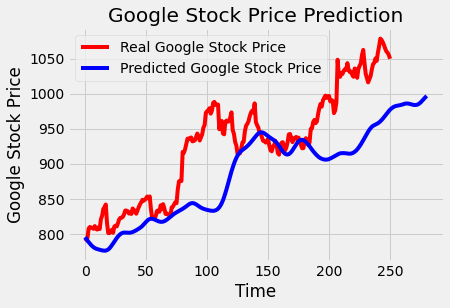

In [110]:
# Visualizing the results for GRU
predictions_plot(testing_set,predicted_stock_price)

In [111]:
print(testing_set[25],predicted_stock_price[25])

[811.840027] [791.70184]


In [112]:
# Evaluating GRU
rmse_return(testing_set,predicted_stock_price)

ValueError: Found input variables with inconsistent numbers of samples: [251, 281]